# Konversi SHP Kabupaten/Kota di Indonesia ke Skala Grid

*Data diperoleh dari Website LapakGIS*

In [31]:
# params = {
#     'nama_kab' : 'Sijunjung', # isi nama kabupaten/kota/kecamatan yang ingin dikonversi
#     'grid_size' : 1000, # dalam Meter
#     'wilayah' : 0 # 0 untuk Kabupaten/Kota, 1 untuk Provinsi, 2 untuk Kecamatan
# }

Membuat grid horizontal: 78it [00:00, 594.50it/s]


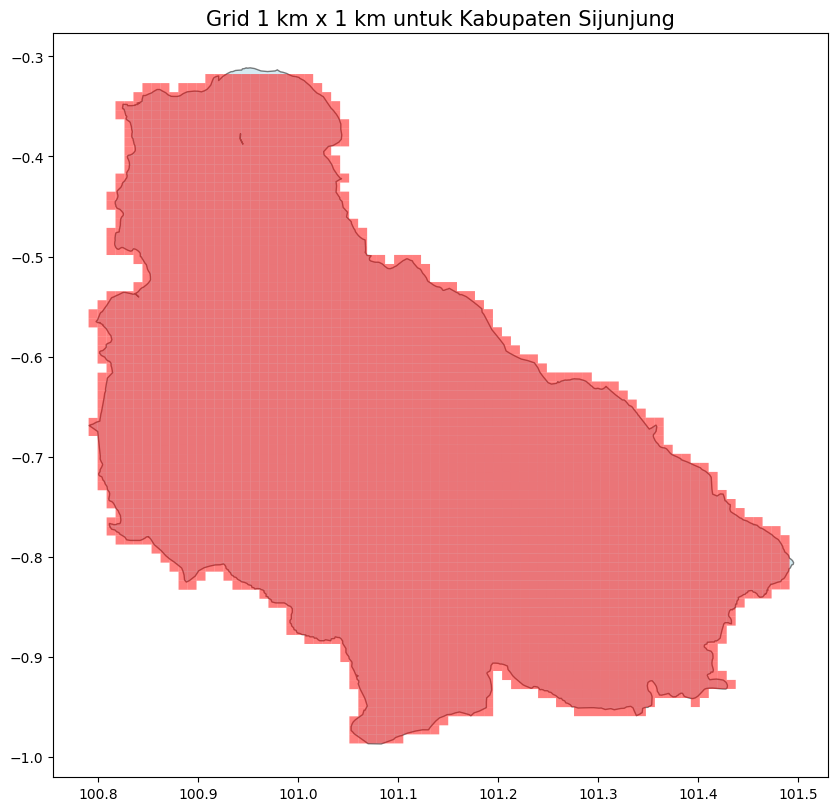

Hasil grid telah diekspor ke: /kaggle/working/grid_aceh_barat.shp


In [32]:
# import geopandas as gpd
# import numpy as np
# import shapely.geometry
# from tqdm import tqdm
# import matplotlib.pyplot as plt

# # Membaca file SHP
# if(params['wilayah']==0):
#     gdf = gpd.read_file("/kaggle/input/datarafi/BATAS KABUPATEN KOTA DESEMBER 2019 DUKCAPIL/wilayah_2019.shp")
#     # Filter data untuk KAB_KOTA = "Aceh Barat"
#     gdf = gdf[gdf["KAB_KOTA"] == params['nama_kab'].upper()]  # Pastikan kolom KAB_KOTA ada dalam data
# elif(params['wilayah']==1):
#     gdf = gpd.read_file("/kaggle/input/datarafi/BATAS KABUPATEN KOTA DESEMBER 2019 DUKCAPIL/wilayah_2019.shp")
# else:
#     gdf = gpd.read_file("/kaggle/input/batas-wilayah-kecamatan-indonesia-2024/batasKecamatan2024.shp")
#     # Filter data untuk KAB_KOTA = "Aceh Barat"
#     gdf = gdf[gdf["WADMKC"] == params['nama_kab']]  # Pastikan kolom KAB_KOTA ada dalam data

# # Ubah STEP menjadi 1 km (1,000 meter)
# STEP = params['grid_size']  

# # CRS dalam proyeksi metrik (biasanya UTM)
# crs = gdf.estimate_utm_crs()
# a, b, c, d = gdf.to_crs(crs).total_bounds

# # Membuat grid untuk geometri dengan ukuran 1 km x 1 km
# grid_geometries = []
# for minx, maxx in tqdm(zip(np.arange(a, c, STEP), np.arange(a, c, STEP)[1:]), desc="Membuat grid horizontal"):
#     for miny, maxy in zip(np.arange(b, d, STEP), np.arange(b, d, STEP)[1:]):
#         grid_geometries.append(shapely.geometry.box(minx, miny, maxx, maxy))

# gdf_grid = gpd.GeoDataFrame(geometry=grid_geometries, crs=crs).to_crs(gdf.crs)

# # Menghindari grid yang melintasi antimeridian
# gdf_grid = gdf_grid.loc[~gdf_grid["geometry"].bounds.pipe(lambda d: d["maxx"] - d["minx"]).ge(350)]

# # Membatasi grid hanya pada area yang beririsan dengan geometri asli
# gdf_grid = (
#     gdf_grid.sjoin(gdf.dissolve().loc[:, ["geometry"]])
#     .pipe(lambda d: d.groupby(d.index).first())
#     .set_crs(gdf.crs)
#     .drop(columns=["index_right"])
# )

# # Visualisasi hasil grid menggunakan Matplotlib
# fig, ax = plt.subplots(figsize=(10, 10))
# gdf.plot(ax=ax, color="lightblue", edgecolor="black", alpha=0.5)  # Plotkan geometri wilayah
# gdf_grid.plot(ax=ax, color="red", alpha=0.5)  # Plotkan grid
# ax.set_title(f"Grid 1 km x 1 km untuk Kabupaten {params['nama_kab']}", fontsize=15)
# plt.show()

# # Ekspor hasil grid ke file SHP

# gdf_grid.to_file(f"/kaggle/working/{params['nama_kab']}-konversi-{params['grid_size']/1000}KM.shp")
# print(f"Hasil grid telah diekspor ke: {output_path}")


In [56]:
params = {
    'nama_prov' : ['DKI Jakarta','Jawa Barat'], # isi nama kabupaten/kota/kecamatan yang ingin dikonversi
    'grid_size' : 1000, # dalam Meter
    'wilayah' : 0 # 0 untuk Kabupaten/Kota, 1 untuk Provinsi, 2 untuk Kecamatan
}

Membuat grid horizontal: 274it [00:01, 150.44it/s]
/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


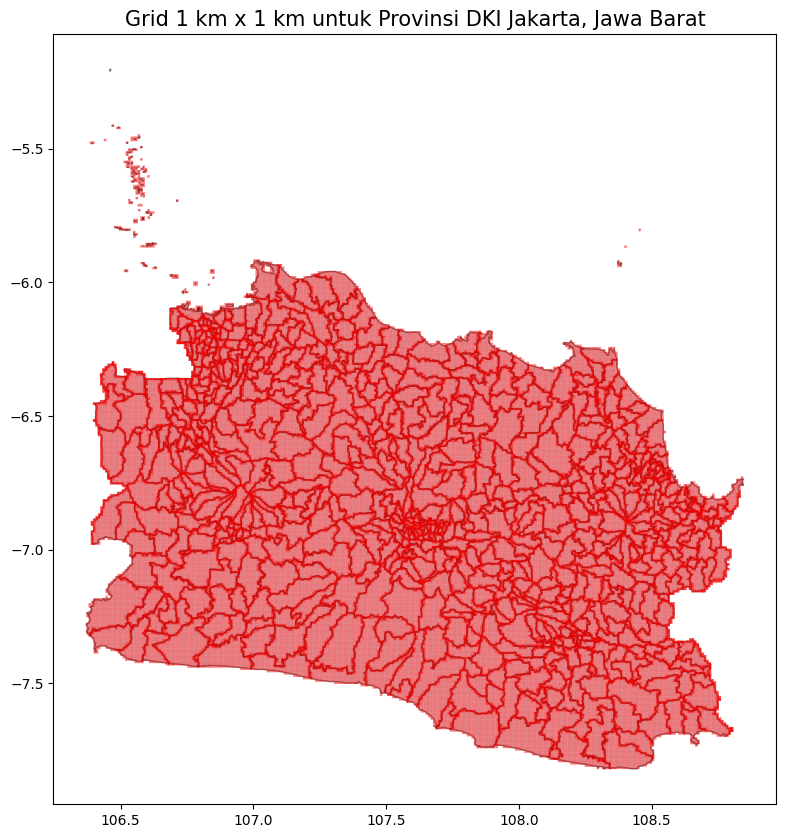

<ipython-input-58-34581fa45258>:58: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_grid.to_file(os.path.join(output_dir, output_shp))


Hasil grid telah diekspor ke ZIP: /kaggle/working/DKI Jakarta_Jawa Barat-konversi-1.0KM.zip


In [58]:
import geopandas as gpd
import numpy as np
import shapely.geometry
from tqdm import tqdm
import matplotlib.pyplot as plt
import zipfile
import os

# Daftar provinsi yang ingin difilter (misalnya Aceh, Riau, dan Sumatera Utara)
provinsi_list = params['nama_prov']  # Misal, params['nama_provs'] adalah list yang berisi nama provinsi

# Membaca file SHP
gdf = gpd.read_file("/kaggle/input/batas-wilayah-kecamatan-indonesia-2024/batasKecamatan2024.shp")

# Filter data untuk beberapa PROVINSI
gdf_provinsi = gdf[gdf["WADMPR"].isin(provinsi_list)]  # Filter berdasarkan beberapa provinsi

# Pendefinisian Resolusi Spasial
STEP = params['grid_size']

# CRS dalam proyeksi metrik (biasanya UTM)
crs = gdf_provinsi.estimate_utm_crs()
a, b, c, d = gdf_provinsi.to_crs(crs).total_bounds

print("Pembentukan Grid Dimulai ...")
# Membuat grid untuk geometri dengan ukuran sesuai yang didefinisikan pada variabel STEP
grid_geometries = []
for minx, maxx in tqdm(zip(np.arange(a, c, STEP), np.arange(a, c, STEP)[1:]), desc="Membuat grid horizontal"):
    for miny, maxy in zip(np.arange(b, d, STEP), np.arange(b, d, STEP)[1:]):
        grid_geometries.append(shapely.geometry.box(minx, miny, maxx, maxy))

# Membuat GeoDataFrame untuk grid
gdf_grid = gpd.GeoDataFrame(geometry=grid_geometries, crs=crs).to_crs(gdf_provinsi.crs)

# Menghindari grid yang melintasi antimeridian
gdf_grid = gdf_grid.loc[~gdf_grid["geometry"].bounds.pipe(lambda d: d["maxx"] - d["minx"]).ge(350)]

print("Pembatasan Grid Berdasarkan Batas Wilayah Dimulai ...")
# Membatasi grid hanya pada area yang beririsan dengan geometri provinsi
gdf_grid = (
    gdf_grid.sjoin(gdf_provinsi.dissolve().loc[:, ["geometry", "WADMPR"]])  # Gunakan 'WADMPR' di sini
    .pipe(lambda d: d.groupby(d.index).first())
    .set_crs(gdf_provinsi.crs)
    .drop(columns=["index_right"])
)

# Menambahkan kolom WADMKK dan WADMKC pada grid yang bersesuaian
gdf_grid = gdf_grid.sjoin(gdf[["geometry", "WADMKK", "WADMKC"]], how="left", op="intersects")

print("Pembentukan Visualisasi File Hasil Konversi Grid ...")
# Visualisasi hasil grid menggunakan Matplotlib
fig, ax = plt.subplots(figsize=(10, 10))
gdf_provinsi.plot(ax=ax, color="lightblue", edgecolor="black", alpha=0.5)  # Plotkan geometri provinsi
gdf_grid.plot(ax=ax, color="red", alpha=0.5)  # Plotkan grid
ax.set_title(f"Grid 1 km x 1 km untuk Provinsi {', '.join(provinsi_list)}", fontsize=15)
plt.show()

# Menyimpan hasil grid dalam file SHP sementara
output_dir = "/kaggle/working/"
output_shp = f"{'_'.join(provinsi_list)}-konversi-{params['grid_size']/1000}KM.shp"
gdf_grid.to_file(os.path.join(output_dir, output_shp))

# Membuat ZIP dari file SHP
zip_filename = f"{'_'.join(provinsi_list)}-konversi-{params['grid_size']/1000}KM.zip"
with zipfile.ZipFile(os.path.join(output_dir, zip_filename), 'w') as zipf:
    for ext in ['shp', 'shx', 'dbf', 'prj', 'cpg']:
        zipf.write(os.path.join(output_dir, f"{'_'.join(provinsi_list)}-konversi-{params['grid_size']/1000}KM.{ext}"),
                   arcname=f"{'_'.join(provinsi_list)}-konversi-{params['grid_size']/1000}KM.{ext}")

print(f"Hasil grid telah diekspor ke ZIP: {os.path.join(output_dir, zip_filename)}")


In [59]:
gdf_grid.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 55380 entries, 57 to 79290
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   geometry     55380 non-null  geometry
 1   WADMPR       55380 non-null  object  
 2   index_right  55380 non-null  int64   
 3   WADMKK       55380 non-null  object  
 4   WADMKC       55380 non-null  object  
dtypes: geometry(1), int64(1), object(3)
memory usage: 2.5+ MB
